In [70]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import dask.dataframe as dd
from scipy import stats
import random
import math
import datetime
from matplotlib.patches import Rectangle
%matplotlib inline

In [106]:
#couldn't use, poor documentation
#from dask_ml.linear_model import LogisticRegression
#from dask_ml.linear_model import PartialSGDRegressor

In [90]:
#df = dd.read_csv("GDELT_Reduced.txt", sep="\t")

In [117]:
colNames=['Date','Source','Target','CAMEOCode','NumEvents','NumArts','QuadClass','Goldstein','SourceGeoType','SourceGeoLat','SourceGeoLong','TargetGeoType','TargetGeoLat','TargetGeoLong','ActionGeoType','ActionGeoLat','ActionGeoLong']
dtypes={'Date':np.int32,'Source':np.str,'Target':np.str,'CAMEOCode':np.float16,'NumEvents':np.int16,'NumArts':np.int8,'QuadClass':np.int8,'Goldstein':np.float16,'SourceGeoType':np.float16,'SourceGeoLat':np.float16,'SourceGeoLong':np.float16,'TargetGeoType':np.float16,'TargetGeoLat':np.float16,'TargetGeoLong':np.float16,'ActionGeoType':np.float16,'ActionGeoLat':np.float16,'ActionGeoLong':np.float16}
df = dd.read_csv("GDELT_Reduced.txt", sep="\t", names = colNames, dtype = dtypes, skiprows = 1)

In [109]:
df.head()
# was getting error of having '---' in data. Used Emeditor software to find and replace with 0
len(df.index)

87298046

In [110]:
#didn't work, poor documentation
data = df[['Date','Source','Target','CAMEOCode','NumEvents','NumArts','QuadClass','SourceGeoType','SourceGeoLat','SourceGeoLong','TargetGeoType','TargetGeoLat','TargetGeoLong','ActionGeoType','ActionGeoLat','ActionGeoLong']]
labels = df['Goldstein']
lr = LogisticRegression()
lr.fit(data, labels)

TypeError: 

In [115]:
#didn't work, poor documentation
data = df[['Date','Source','Target','CAMEOCode','NumEvents','NumArts','QuadClass','SourceGeoType','SourceGeoLat','SourceGeoLong','TargetGeoType','TargetGeoLat','TargetGeoLong','ActionGeoType','ActionGeoLat','ActionGeoLong']].compute()
labels = df['Goldstein'].compute()
clf = PartialSGDRegressor()
clf.fit(data, labels)

AttributeError: 'DataFrame' object has no attribute 'chunks'

In [114]:
#look for most common CAMEOCodes
df.CAMEOCode.value_counts().compute()

10.0      6385234
42.0      6205339
43.0      6115151
40.0      6081865
20.0      4264405
46.0      4010101
51.0      3916973
36.0      3845956
190.0     3549102
173.0     2831628
13.0      2138515
112.0     1897935
120.0     1617981
111.0     1570701
30.0      1569631
90.0      1439511
12.0      1407070
57.0      1401365
110.0     1327206
60.0      1203097
100.0     1118380
50.0      1100415
193.0     1019758
71.0       961867
80.0       902417
130.0      864397
14.0       770880
70.0       767960
141.0      672615
84.0       625944
           ...   
812.0         330
1322.0        298
1661.0        276
1431.0        227
1413.0        215
126.0         209
1034.0        186
252.0         161
165.0         145
313.0         141
1385.0        103
1012.0         95
1245.0         90
1212.0         81
1234.0         80
1051.0         63
1414.0         53
0.0            29
1223.0         22
135.0          19
832.0          17
104.0          16
1224.0         14
1055.0         12
342.0     

In [122]:
#df[df['CAMEOCode']==202].count().compute()

Date             32305
Source           32305
Target           32305
CAMEOCode        32305
NumEvents        32305
NumArts          32305
QuadClass        32305
Goldstein        32305
SourceGeoType    30524
SourceGeoLat     30507
SourceGeoLong    30507
TargetGeoType    30917
TargetGeoLat     30907
TargetGeoLong    30907
ActionGeoType    31975
ActionGeoLat     31961
ActionGeoLong    31961
dtype: int64

Interesting CAMEOCodes

190 - use conventional military force
51 - praise or endorse
173 - arrest detain or charge with legal action
13* - threaten
1385 - threaten w/ wmd
111-criticize denounce
11*disaprove
19*fight
14*protest
145* - violent protest
20* use unconventional mass violence



In [2]:
colNames=['Date','Source','Target','CAMEOCode','NumEvents','NumArts','QuadClass','Goldstein','SourceGeoType','SourceGeoLat','SourceGeoLong','TargetGeoType','TargetGeoLat','TargetGeoLong','ActionGeoType','ActionGeoLat','ActionGeoLong']
dtypes={'Date':np.int32,'Source':np.str,'Target':np.str,'CAMEOCode':np.str,'NumEvents':np.int16,'NumArts':np.int8,'QuadClass':np.int8,'Goldstein':np.float16,'SourceGeoType':np.float16,'SourceGeoLat':np.float16,'SourceGeoLong':np.float16,'TargetGeoType':np.float16,'TargetGeoLat':np.float16,'TargetGeoLong':np.float16,'ActionGeoType':np.float16,'ActionGeoLat':np.float16,'ActionGeoLong':np.float16}
df2 = dd.read_csv("GDELT_Reduced.txt", sep="\t", names = colNames, dtype = dtypes, skiprows = 1)

In [3]:
#retrieve rows with certain CameoCodes, ended up investigating threats (pattern13)
pattern20 = r'^(20)'
pattern145 = r'^(145)'
pattern19 = r'^(19)'
pattern11 = r'^(11)'
pattern13 = r'^(13)'
pattern1385 = r'^(1385)'
pattern173 = r'^(173)'
pattern051 = r'^(051)'

df3=df2[(df2['CAMEOCode'].str.contains(pattern20))|(df2['CAMEOCode'].str.contains(pattern145))|(df2['CAMEOCode'].str.contains(pattern19))|(df2['CAMEOCode'].str.contains(pattern11))|(df2['CAMEOCode'].str.contains(pattern13))|(df2['CAMEOCode'].str.contains(pattern173))|(df2['CAMEOCode'].str.contains(pattern051))]#)|()|()|()|()
dfNukes=df2[(df2['CAMEOCode'].str.contains(pattern1385))]

/home/user/anaconda3/lib/python3.6/site-packages/dask/dataframe/accessor.py:48: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


In [4]:
#retrieve seperate dataframes for each interesting CAMEOCode
df20=df2[df2['CAMEOCode'].str.contains(pattern20)]
df145=df2[df2['CAMEOCode'].str.contains(pattern145)]
df19=df2[df2['CAMEOCode'].str.contains(pattern19)]
df11=df2[df2['CAMEOCode'].str.contains(pattern11)]
df13=df2[df2['CAMEOCode'].str.contains(pattern13)]
df1385=df2[df2['CAMEOCode'].str.contains(pattern1385)]
df173=df2[df2['CAMEOCode'].str.contains(pattern173)]
df051=df2[df2['CAMEOCode'].str.contains(pattern051)]

/home/user/anaconda3/lib/python3.6/site-packages/dask/dataframe/accessor.py:48: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


In [125]:
print(df3.CAMEOCode.value_counts().compute())
df3.head()

C:\Users\Andrews Lab\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:49: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


051     3916973
190     3549102
173     2831628
112     1897935
111     1570701
110     1327206
193     1019758
130      864397
114      443396
192      358119
138      265789
194      200124
195      166232
1123     148573
1124     134234
145       82498
115       68539
191       58558
1121      42501
133       36955
113       36604
139       34452
1384      32453
202       32305
131       29844
1312      29543
1383      18506
203       14109
1122      13666
134        9432
1125       6985
1313       6314
196        5411
137        3836
201        2096
116        1830
136        1713
1311        933
132         589
1382        436
1322        298
1385        103
135          19
1324          2
1321          1
Name: CAMEOCode, dtype: int64


,Date,Source,Target,CAMEOCode,NumEvents,NumArts,QuadClass,Goldstein,SourceGeoType,SourceGeoLat,SourceGeoLong,TargetGeoType,TargetGeoLat,TargetGeoLong,ActionGeoType,ActionGeoLat,ActionGeoLong
9,19790101,BUS,CHNGOV,111,1,7,3,-2.000000,4.0,52.125000,140.375,4.0,52.125000,140.375000,4.0,52.125000,140.375000
14,19790101,CAN,KHM,051,2,17,1,3.400391,1.0,60.000000,-95.000,1.0,60.000000,-95.000000,1.0,60.000000,-95.000000
19,19790101,CHL,GOV,112,1,4,3,-2.000000,1.0,-30.000000,-71.000,1.0,-30.000000,-71.000000,1.0,-30.000000,-71.000000
27,19790101,CHN,CHNGOV,051,1,5,1,3.400391,1.0,-30.000000,-71.000,1.0,42.843750,12.835938,4.0,47.500000,19.078125
29,19790101,CHN,CRM,112,2,10,3,-2.000000,4.0,21.078125,106.500,4.0,21.078125,106.500000,4.0,21.078125,106.500000


In [128]:
#years=range(19800000,20150000,10000)
#for i in years:
#     df=df20.where(df.Date > i-10000).where(df.Date < i).where(df.Source == 'RUS').QuadClass.value_counts().compute()
#print counts of one year's threats
df13.where(df13.Date > 19790000).where(df13.Date < 19800000).Source.value_counts().compute()

C:\Users\Andrews Lab\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:49: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


GOV          222
USA          148
RUS           93
VNM           90
MIL           88
CHN           86
ISR           66
MED           64
IRN           61
GBR           52
THA           48
REB           46
LEG           29
AFR           29
KHM           27
EGY           27
JPN           25
ZWE           23
THAGOV        22
USAGOV        20
DEU           19
COP           18
CVL           18
LBN           18
IRNGOV        17
RUSGOV        16
IRQ           16
FRA           16
TZA           16
PSE           15
            ... 
PAN            1
GBRREB         1
PGS            1
PHLGOV         1
GOVAGR         1
GBRELI         1
GBRCVL         1
PLW            1
FRAMED         1
PRKGOV         1
PSECVL         1
KHMELIGOV      1
GOVBUS         1
NMRGOV         1
MDVELI         1
NOR            1
IGOSEAASN      1
NRMUFO050      1
IGOAFROAU      1
IDNGOVMIL      1
IDNGOV         1
HUN            1
GOVCRM         1
HTI            1
HRV            1
HLH            1
OMN            1
GOVMED        

In [131]:
#print counts of threats for top 20 countries for 1789-2014, though the year is off by 1 when printed
years=range(19800000,20150000,10000)
for i in years:
    print(i)
    print(df13.where(df13.Date > i-10000).where(df13.Date < i).Source.value_counts().nlargest(20).compute())

19800000


C:\Users\Andrews Lab\Anaconda3\lib\site-packages\dask\dataframe\accessor.py:49: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  out = getattr(getattr(obj, accessor, obj), attr)(*args, **kwargs)


GOV       222
USA       148
RUS        93
VNM        90
MIL        88
CHN        86
ISR        66
MED        64
IRN        61
GBR        52
THA        48
REB        46
LEG        29
AFR        29
KHM        27
EGY        27
JPN        25
ZWE        23
THAGOV     22
USAGOV     20
Name: Source, dtype: int64
19810000
GOV       321
USA       294
IRN       233
RUS       202
MIL       121
MED        90
GBR        89
CHN        86
IRQ        86
ISR        85
AFG        74
POL        71
USAGOV     56
IRNGOV     50
VNM        45
EGY        43
SYR        41
AFR        37
FRA        35
LEG        33
Name: Source, dtype: int64
19820000
GOV       497
USA       392
RUS       238
ISR       227
POL       160
MED       153
MIL       151
GBR       138
IRN       122
CHN       102
SYR        78
REB        74
LEG        71
LBY        67
COP        66
DEU        64
USAGOV     60
EGY        52
ISRGOV     51
LBN        50
Name: Source, dtype: int64
19830000
GOV       558
USA       431
ISR       338
GBR       

KeyboardInterrupt: 

In [24]:
#manually copied printed data into excel and then read that into dataframe
col_names=['Year','USA','RUSSIA','IRAN','CHINA','GREAT BRITAIN','ISRAEL']
dfthreats=pd.read_csv('threats.csv',skiprows=1,names=col_names)
dfthreats.head(40)

,Year,USA,RUSSIA,IRAN,CHINA,GREAT BRITAIN,ISRAEL
0,1979,148,93,61,86,52,66
1,1980,294,202,233,86,89,85
2,1981,392,238,122,102,138,227
3,1982,431,162,127,75,290,338
4,1983,466,249,107,0,120,226
5,1984,398,148,189,0,142,163
6,1985,418,144,173,0,131,214
7,1986,554,143,188,0,156,190
8,1987,486,125,508,0,114,137
9,1988,381,151,253,0,121,184


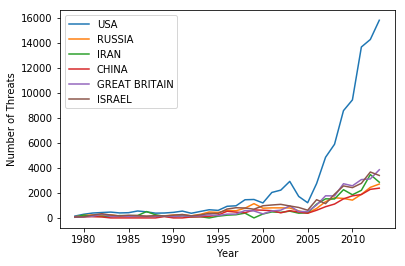

In [148]:
#graph with USA
plt.plot(dfthreats['Year'], dfthreats['USA'])
plt.plot(dfthreats['Year'], dfthreats['RUSSIA'])
plt.plot(dfthreats['Year'], dfthreats['IRAN'])
plt.plot(dfthreats['Year'], dfthreats['CHINA'])
plt.plot(dfthreats['Year'], dfthreats['GREAT BRITAIN'])
plt.plot(dfthreats['Year'], dfthreats['ISRAEL'])
plt.xlabel('Year')
plt.ylabel('Number of Threats')
plt.legend()

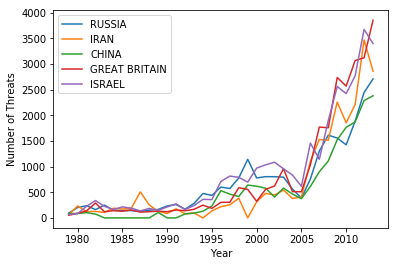

In [147]:
#graph without USA
plt.plot(dfthreats['Year'], dfthreats['RUSSIA'])
plt.plot(dfthreats['Year'], dfthreats['IRAN'])
plt.plot(dfthreats['Year'], dfthreats['CHINA'])
plt.plot(dfthreats['Year'], dfthreats['GREAT BRITAIN'])
plt.plot(dfthreats['Year'], dfthreats['ISRAEL'])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Threats')
plt.show()

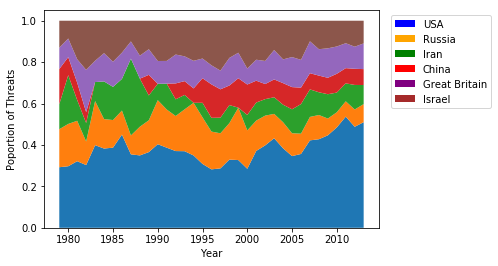

In [91]:
col_names=['Year','USA','RUSSIA','IRAN','CHINA','GREATBRITAIN','ISRAEL']
dfthreats=pd.read_csv('threats.csv',skiprows=1,names=col_names)
dfvalues=dfthreats.loc[:,['USA','RUSSIA','IRAN','CHINA','GREATBRITAIN','ISRAEL']]
for i in dfvalues.index:
    sum_year=dfvalues.loc[i].values.sum()
    for j in dfvalues.columns:
        dfvalues.loc[i,j]=dfvalues.loc[i,j]/sum_year
fig, ax = plt.subplots()
ax.stackplot(dfthreats.Year, dfvalues.USA, dfvalues.RUSSIA, dfvalues.IRAN,dfvalues.CHINA,dfvalues.GREATBRITAIN,dfvalues.ISRAEL)

p1 = Rectangle((0, 0), 1, 1, fc="blue")
p2 = Rectangle((0, 0), 1, 1, fc="orange")
p3 = Rectangle((0, 0), 1, 1, fc="green")
p4 = Rectangle((0, 0), 1, 1, fc="red")
p5 = Rectangle((0, 0), 1, 1, fc="purple")
p6 = Rectangle((0, 0), 1, 1, fc="brown")

plt.legend([p1, p2,p3,p4,p5,p6], ['USA', 'Russia','Iran','China','Great Britain','Israel'],loc=1,bbox_to_anchor=(1.35, 1))
plt.xlabel('Year')
plt.ylabel('Poportion of Threats')
plt.show()

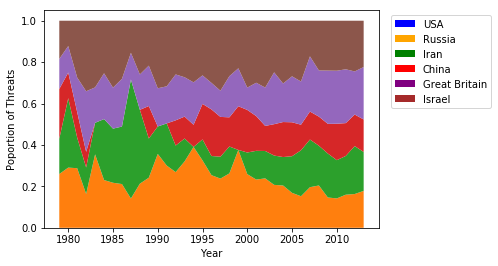

In [96]:
col_names=['Year','USA','RUSSIA','IRAN','CHINA','GREATBRITAIN','ISRAEL']
dfthreats=pd.read_csv('threats.csv',skiprows=1,names=col_names)
dfvalues=dfthreats.loc[:,['RUSSIA','IRAN','CHINA','GREATBRITAIN','ISRAEL']]
for i in dfvalues.index:
    sum_year=dfvalues.loc[i].values.sum()
    for j in dfvalues.columns:
        dfvalues.loc[i,j]=dfvalues.loc[i,j]/sum_year
fig, ax = plt.subplots()
blue=[0]*len(dfvalues.index)
ax.stackplot(dfthreats.Year,blue,dfvalues.RUSSIA, dfvalues.IRAN,dfvalues.CHINA,dfvalues.GREATBRITAIN,dfvalues.ISRAEL)
p1 = Rectangle((0, 0), 1, 1, fc="blue")
p2 = Rectangle((0, 0), 1, 1, fc="orange")
p3 = Rectangle((0, 0), 1, 1, fc="green")
p4 = Rectangle((0, 0), 1, 1, fc="red")
p5 = Rectangle((0, 0), 1, 1, fc="purple")
p6 = Rectangle((0, 0), 1, 1, fc="brown")

plt.legend([p1, p2,p3,p4,p5,p6], ['USA', 'Russia','Iran','China','Great Britain','Israel'],loc=1,bbox_to_anchor=(1.35, 1))
plt.xlabel('Year')
plt.ylabel('Poportion of Threats')
plt.show()